In [67]:
import pandas as pd
import numpy as np
df=pd.read_csv('boat_dataset.csv', encoding='latin1')

### Drop if more than 50% Missing

In [68]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Identify columns to drop based on missing value threshold
columns_to_drop = missing_percentage[missing_percentage > 60].index.tolist()

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

In [89]:
df.head(2).T

,0,1
Year Built,2017,2020
Length,4,4
Width,1,1
Depth,0,0
Displacement,0,150
Number of Cabins,0,0
Number of beds,0,0
Fuel Capacity,0,0
Engine Hours,0,0
PriceClean,3337,3490


In [70]:
# Drop Columns
columns_to_drop = ['Boat Type', 'Manufacturer', 'Model', 'Comments', 'Equipment','Location']
df.drop(columns=columns_to_drop, inplace=True)


### Clean up columns with strings that are numeric in nature

In [71]:
# Replace ' m' with an empty string and convert to float for these columns
for col in ['Length', 'Width', 'Depth']:
    df[col] = pd.to_numeric(df[col].str.replace(' m', '', regex=True), errors='coerce')

In [72]:
# Replace ' kg' with an empty string and convert to float for this column
df['Displacement'] = pd.to_numeric(df['Displacement'].str.replace(' kg', '', regex=True), errors='coerce')

In [73]:
df['Fuel Capacity'] = pd.to_numeric(df['Fuel Capacity'].str.replace(' l', '', regex=True), errors='coerce')
df['Engine Hours'] = pd.to_numeric(df['Engine Hours'].str.replace('\s*h\s*$', '', regex=True), errors='coerce')

In [74]:
df['Currency'] = df['Price'].str.extract(r'([A-Z£]+)')
df['Currency'].replace('P', pd.NA, inplace=True)

In [75]:
# Remove currency codes and commas, replace '.' with ',', and add '.00'
df['PriceClean'] = df['Price'].str.replace(r'([Â£A-Z]+)', '', regex=True)\
                                  .str.replace('.', ',')\
                                  .str.replace(',-', '')

In [76]:
# Remove commas from the 'PriceClean' column
df['PriceClean'] = df['PriceClean'].str.replace(',', '')
df['PriceClean'] = pd.to_numeric(df['PriceClean'], errors='coerce')


In [77]:
# Clean columns of non-numeric characters
columns_to_clean = [
    "Year Built", "Length", "Width", "Depth", "Displacement", 
    "Number of Cabins", "Number of beds", "Fuel Capacity", "Engine Hours", "PriceClean"
]

for col in columns_to_clean:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

In [79]:
# Separate numeric and non-numeric columns
numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
non_numeric_cols = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col])]

# Combine the lists to form a new column order
new_cols = numeric_cols + non_numeric_cols

# Reorder the DataFrame
df = df[new_cols]
df.head()

,Year Built,Length,Width,Depth,Displacement,Number of Cabins,Number of beds,Fuel Capacity,Engine Hours,PriceClean,Price,Category,Type,Material,Engine,Engine Performance,Fuel Type,Location,Number of views last 7 days,Currency
0,2017,4,1,0,0,0,0,0,0,3337,"CHF 3.337,-",Power Boats,new boat from stock,NaN,NaN,NaN,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,2020,4,1,0,150,0,0,0,0,3490,"EUR 3.490,-",Power Boats,new boat from stock,Thermoplastic,NaN,NaN,NaN,Germany Â» BÃ¶nningstedt,75,EUR
2,0,3,1,0,0,0,0,0,0,3770,"CHF 3.770,-",Power Boats,new boat from stock,Aluminium,(Permission for Lake of Constance),NaN,NaN,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,2020,3,1,0,110,0,0,0,0,25900,"DKK 25.900,-",Power Boats,new boat from stock,NaN,NaN,NaN,NaN,Denmark Â» Svendborg,64,DKK
4,1974,6,2,0,0,0,2,50,500,35000,"SEK 35.000,-",Power Boats,Used boat,NaN,VolvoPenta MD 2002,1 x 18 HP / 13 kW,NaN,Nordsee Â» VÃ¤stra FrÃ¶lunda,131,SEK


In [81]:
def determine_new_used(value):
    # Check if value is a string before calling .lower()
    if isinstance(value, str):
        if 'used' in value.lower():
            return 0
        elif 'new' in value.lower() or 'display' in value.lower():
            return 1
    # Return None or some default value for non-string values
    return None

# Apply the function to the 'Type' column
df['New_Used'] = df['Type'].apply(determine_new_used)


In [92]:
def map_fuel_type(value):
    if value == 'Diesel':
        return 1
    elif value == 'Unleaded':
        return 2
    else:
        return 3

# Assuming df is your DataFrame
df['Fuel_Type'] = df['Fuel Type'].apply(map_fuel_type)

In [97]:
# Drop Columns
columns_to_drop = ['Engine Performance', 'Material', 'Price', 'Location', 'Engine Performance', 'Type','Category','Engine', 'Fuel Type','Currency']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

#If I want to do some Data engineer work come back to Engine in the future

In [18]:
# Select only the text (object) columns
text_columns = df.select_dtypes(include=['object']).columns

# Count the unique values in each text column
unique_counts = {}
for col in text_columns:
    unique_counts[col] = df[col].nunique()

unique_counts


{}

In [96]:
df['Number of views last 7 days'] = df['Number of views last 7 days'].astype(str).str.replace(r'\D', '', regex=True)
df['Number of views last 7 days'] = pd.to_numeric(df['Number of views last 7 days'], errors='coerce')


In [90]:
df.head()

,Year Built,Length,Width,Depth,Displacement,Number of Cabins,Number of beds,Fuel Capacity,Engine Hours,PriceClean,Category,Engine,Fuel Type,Number of views last 7 days,Currency,New_Used
0,2017,4,1,0,0,0,0,0,0,3337,Power Boats,NaN,NaN,226,CHF,1.0
1,2020,4,1,0,150,0,0,0,0,3490,Power Boats,NaN,NaN,75,EUR,1.0
2,0,3,1,0,0,0,0,0,0,3770,Power Boats,(Permission for Lake of Constance),NaN,124,CHF,1.0
3,2020,3,1,0,110,0,0,0,0,25900,Power Boats,NaN,NaN,64,DKK,1.0
4,1974,6,2,0,0,0,2,50,500,35000,Power Boats,VolvoPenta MD 2002,NaN,131,SEK,0.0


## Account for Currency

In [52]:
df['Currency'].unique()

array(['CHF', 'EUR', 'DKK', 'SEK', '£', <NA>, 'USD'], dtype=object)

In [54]:
# Define a function to convert to USD
def convert_to_usd(amount, currency):
    exchange_rates = {
        'CHF': 1.13,
        'EUR': 1.08,
        'DKK': 0.14,
        'SEK': 0.091,
        '£': 1.26,
        'USD': 1.0  # Assuming USD to USD conversion rate is 1
    }
    
    if pd.isna(currency) or pd.isna(amount):
        return np.nan
    
    return amount * exchange_rates.get(currency, 1.0)

# Create a new column 'Amount_in_USD' to store the converted amounts
df['Amount_in_USD'] = df.apply(lambda row: convert_to_usd(row['PriceClean'], row['Currency']), axis=1)



NameError: name 'np' is not defined

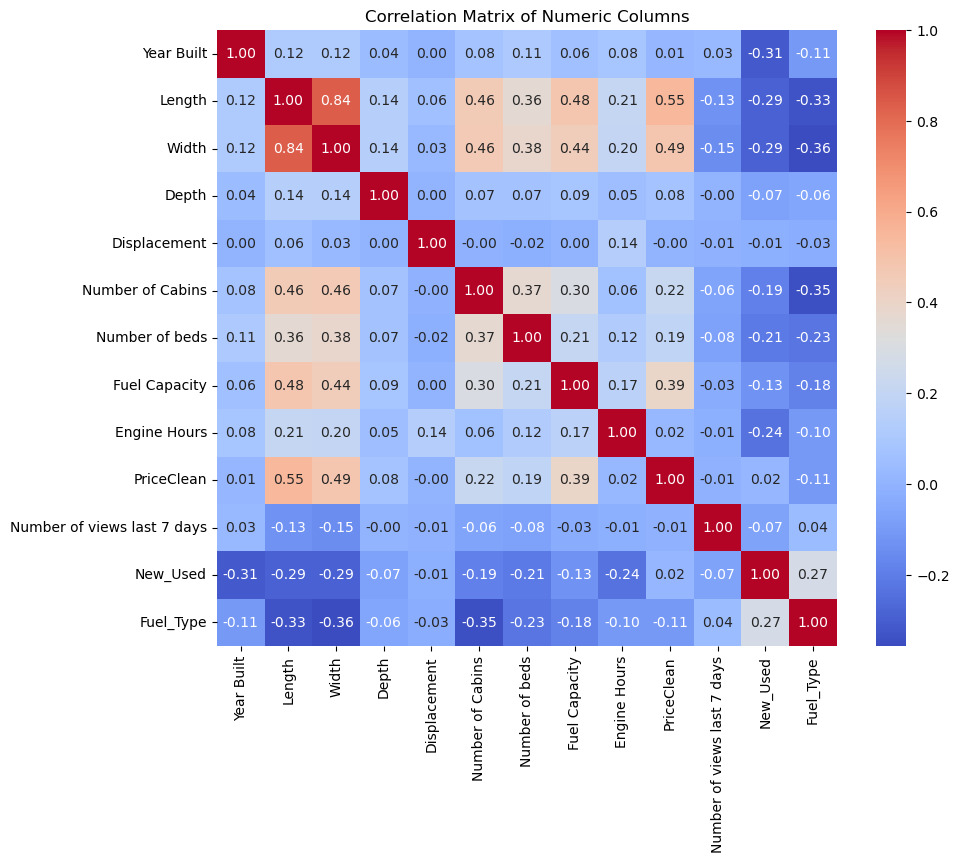

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numeric columns
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()


                             Year Built    Length     Width     Depth  \
Year Built                     1.000000  0.115820  0.119001  0.037929   
Length                         0.115820  1.000000  0.840557  0.141245   
Width                          0.119001  0.840557  1.000000  0.141434   
Depth                          0.037929  0.141245  0.141434  1.000000   
Displacement                   0.002648  0.058967  0.029130  0.003346   
Number of Cabins               0.075098  0.455558  0.459493  0.070600   
Number of beds                 0.108535  0.360069  0.384096  0.067977   
Fuel Capacity                  0.056875  0.484372  0.441949  0.086631   
Engine Hours                   0.083915  0.210110  0.200048  0.045808   
PriceClean                     0.014124  0.546624  0.485029  0.077564   
Number of views last 7 days    0.025111 -0.133163 -0.148634 -0.001923   
New_Used                      -0.313521 -0.291962 -0.288788 -0.071264   
Fuel_Type                     -0.107188 -0.331359 -

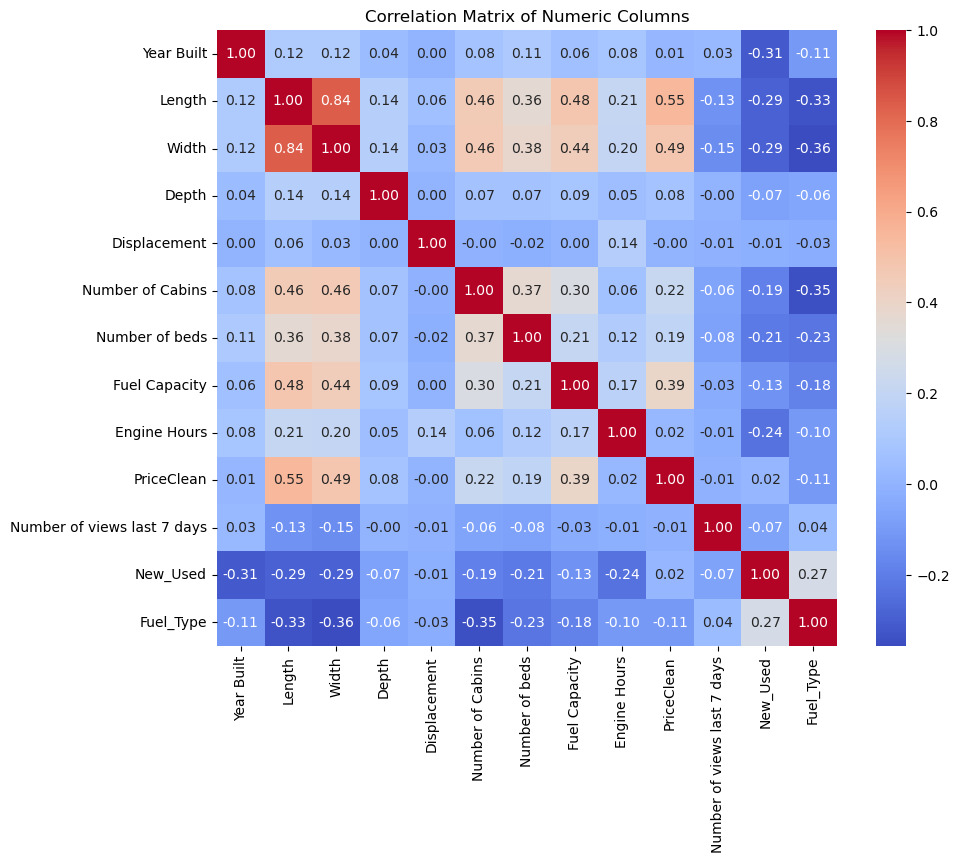

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
# Compute the correlation matrix for numeric columns
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Print the correlation matrix to the console
print(corr_matrix)

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()


In [100]:
df.to_csv('Boat_Cleaned.csv', index=False)

## Modeling

In [ ]:
y = df.PriceClean

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year Built,10344.0,1894.937162,4.566322e+02,0.0,1996.0,2007.0,2017.0,2021.0
Length,10344.0,11.036446,5.991431e+00,0.0,7.0,10.0,13.0,100.0
Width,10344.0,3.024362,1.275607e+00,0.0,2.0,3.0,4.0,25.0
Depth,10344.0,0.453693,2.105361e+00,0.0,0.0,0.0,1.0,85.0
Displacement,10344.0,66117.934261,2.409344e+06,0.0,0.0,0.0,4000.0,100000000.0
Number of Cabins,10344.0,1.345224,1.990313e+00,-1.0,0.0,1.0,2.0,96.0
Number of beds,10344.0,2.691705,3.772920e+00,-23.0,0.0,2.0,4.0,266.0
Fuel Capacity,10344.0,965.353248,3.090877e+03,0.0,0.0,250.0,940.0,130000.0
Engine Hours,10344.0,424.248743,1.004158e+03,0.0,0.0,0.0,555.5,32767.0
PriceClean,10344.0,322181.184648,1.022790e+06,0.0,42270.0,94775.0,250000.0,31000000.0


In [110]:
# Import necessary library
from sklearn.tree import DecisionTreeRegressor

# Separate features and target variable from df
X = df.drop(columns=['PriceClean']) 
y = df['PriceClean']

# Define model. Specify a number for random_state to ensure same results each run
boat_model = DecisionTreeRegressor(random_state=1)

# Fit model
boat_model.fit(X, y)


DecisionTreeRegressor(random_state=1)

In [112]:
print(X.head())
print(boat_model.predict(X.head()))

   Year Built  Length  Width  Depth  Displacement  Number of Cabins  \
0        2017       4      1      0             0                 0   
1        2020       4      1      0           150                 0   
2           0       3      1      0             0                 0   
3        2020       3      1      0           110                 0   
4        1974       6      2      0             0                 0   

   Number of beds  Fuel Capacity  Engine Hours  Number of views last 7 days  \
0               0              0             0                        226.0   
1               0              0             0                         75.0   
2               0              0             0                        124.0   
3               0              0             0                         64.0   
4               2             50           500                        131.0   

   New_Used  Fuel_Type  
0       1.0          3  
1       1.0          3  
2       1.0          3 